# Import Packages

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
%matplotlib inline
import  statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox

### Load in data

In [21]:
manatee = pd.read_csv('manatees.csv')

# Testing Linear Regression Assumptions

* testing for linearity and normality

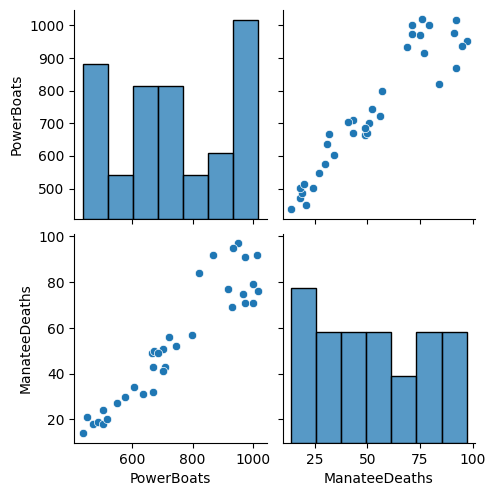

In [22]:
sns.pairplot(manatee)

### To print a histogram with a normal distribution curve 

* If the regular histograms above are not enough to check for normal distribution use the the one below with a normal distribution curve. 

C:\Users\chris\AppData\Local\Temp\ipykernel_29152\2003391834.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(manatee['PowerBoats'])


<AxesSubplot: xlabel='PowerBoats', ylabel='Density'>

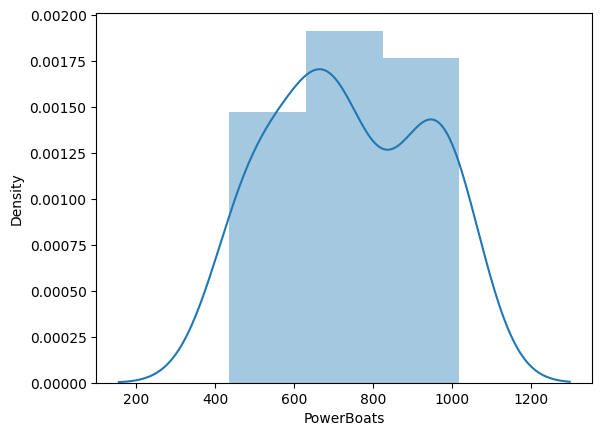

In [23]:
sns.distplot(manatee['PowerBoats'])

C:\Users\chris\AppData\Local\Temp\ipykernel_29152\3421028500.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(manatee['ManateeDeaths'])


<AxesSubplot: xlabel='ManateeDeaths', ylabel='Density'>

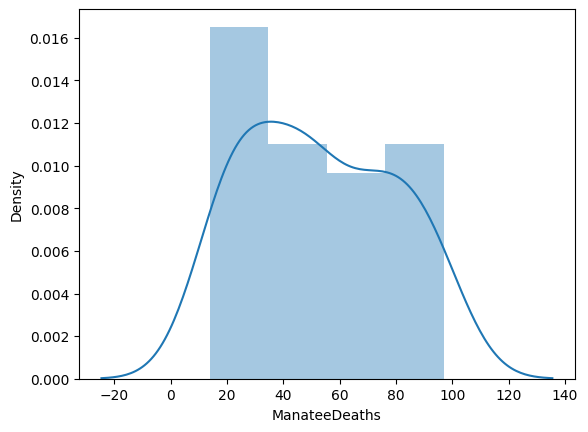

In [24]:
sns.distplot(manatee['ManateeDeaths'])

# To test for homoscedasticity, must create model first. 
using packages:

sklearn and stats models

* StatsModels is easier to read and use

In [25]:
# Must assign x and y values for statsmodels
x = manatee['PowerBoats']
y = manatee['ManateeDeaths']

In [26]:
x.info()

<class 'pandas.core.series.Series'>
RangeIndex: 35 entries, 0 to 34
Series name: PowerBoats
Non-Null Count  Dtype
--------------  -----
35 non-null     int64
dtypes: int64(1)
memory usage: 412.0 bytes


In [27]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 35 entries, 0 to 34
Series name: ManateeDeaths
Non-Null Count  Dtype
--------------  -----
35 non-null     int64
dtypes: int64(1)
memory usage: 412.0 bytes


In [28]:
# create model with the name model
model = sm.OLS(y,x).fit()

### Calculate the Residuals

Unlike R, Python doesn't calculate residuals for you. But it's not too hard. Remember that the residual, or error term, is just the true values (your y from your dataset) minus the predicted values your model found. Go ahead and calculate out your residuals

In [29]:
pred_val = model.fittedvalues.copy()

In [30]:
true_val = manatee['ManateeDeaths'].values.copy()

In [31]:
residual = true_val - pred_val

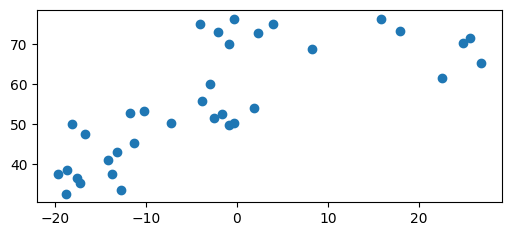

In [32]:
fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)

### Test for homoscedasticity using breusch pagan test. Use the diagnostic.het_bruschepagan test from the 
sms package

In [33]:
sms.diagnostic.het_breuschpagan(residual, manatee[['PowerBoats']])

(14.786518579352656, nan, 24.8716003560108, 1.784950358015071e-05)

* The first number is the lagrange multiplier statistic, nan is the p value for the lagrange. 
* Then the F statistic, the larger it is the more likely it is to be significant. 
* This is the p value to test for homoscedasticity. If it is < .05 (stastically significant), then this means you have violated the assumption of homoscedasticity and your data is, in fact, heteroscedastic

## Another stat model
The second test stats models gives us is the Harvey Collier test. Like with our Breusch Pagan test, if the results are statistically significant, then you have violated the assumption of homoscedasticity.

In [34]:
sms.linear_harvey_collier(model)

TtestResult(statistic=5.479252885631467, pvalue=5.433881942347164e-06, df=31)

As expected the p value is significant so the data needs to be transformed

### Transform the data using boxcox() function

In [35]:
transformed, _ = boxcox(manatee['PowerBoats'])

(array([3., 4., 2., 2., 6., 4., 2., 1., 3., 8.]),
 array([ 62.82863549,  67.12464318,  71.42065088,  75.71665857,
         80.01266627,  84.30867396,  88.60468165,  92.90068935,
         97.19669704, 101.49270474, 105.78871243]),
 <BarContainer object of 10 artists>)

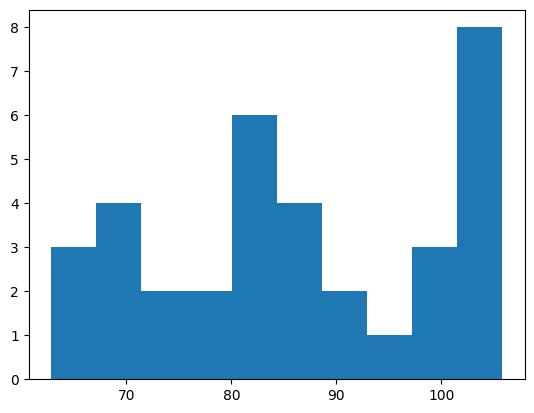

In [36]:
# Transformed
plt.hist(transformed)

(array([4., 4., 2., 3., 7., 1., 2., 1., 4., 7.]),
 array([ 436. ,  494.2,  552.4,  610.6,  668.8,  727. ,  785.2,  843.4,
         901.6,  959.8, 1018. ]),
 <BarContainer object of 10 artists>)

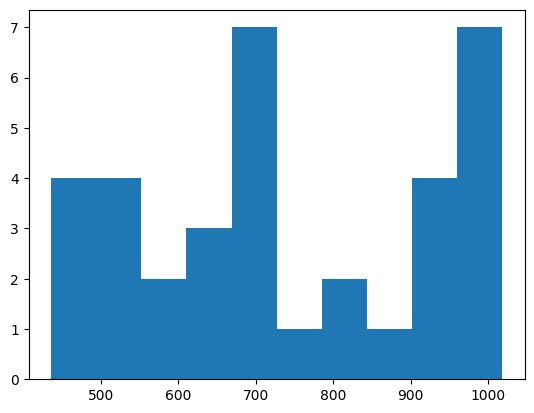

In [37]:
# Original Data
plt.hist(manatee['PowerBoats'])

### As can be seen above, the transformed data is still not normally distributed. 

* Try creating a new model and create new residual values

In [38]:
# statsmodels package is sm
x = transformed
model1 = sm.OLS(y,x).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          ManateeDeaths   R-squared (uncentered):                   0.906
Model:                            OLS   Adj. R-squared (uncentered):              0.903
Method:                 Least Squares   F-statistic:                              328.1
Date:                Fri, 28 Apr 2023   Prob (F-statistic):                    4.88e-19
Time:                        10:30:04   Log-Likelihood:                         -150.84
No. Observations:                  35   AIC:                                      303.7
Df Residuals:                      34   BIC:                                      305.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.6411      0.035     18.113      0.000       0.569       0.713
==============================================================================
Omnibus:                        3.678   Durbin-Watson:                   0.455
Prob(Omnibus):                  0.159   Jarque-Bera (JB):                2.425
Skew:                           0.454   Prob(JB):                        0.297
Kurtosis:                       2.085   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Now create new residual values

In [39]:
pred_val = model1.fittedvalues.copy()
true_val = manatee['ManateeDeaths'].values.copy()
residual = true_val - pred_val

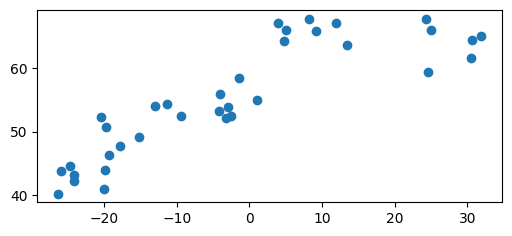

In [40]:
fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)

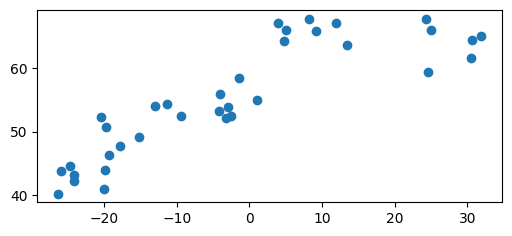

In [41]:
fig, ax = plt.subplots(figsize=(6, 2.5))
ax.scatter(residual, pred_val)

You could also re-test using the Breusch Pagan or the Harvey Collier, but since you already know your data hasn't been fixed, you'll skip this step in Python.


# Test for Mulitcolinearity

In [42]:
manatee.corr()

,PowerBoats,ManateeDeaths
PowerBoats,1.000000,0.937637
ManateeDeaths,0.937637,1.000000


<AxesSubplot: >

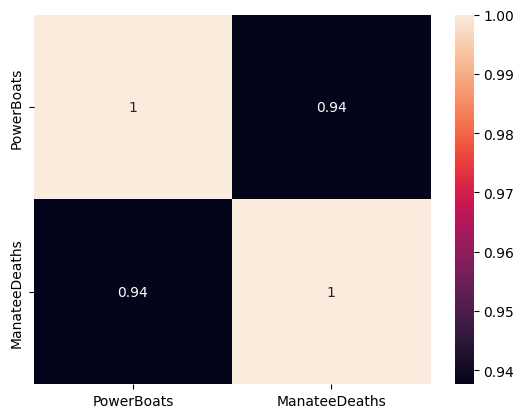

In [43]:
sns.heatmap(manatee.corr(), annot = True)

# Screening for outliers
* In python it is easy to create a graph that shows influence of data points by looking at the leverages and studentized deleted residuals. 
* influence_plot() function comes from statsmodels

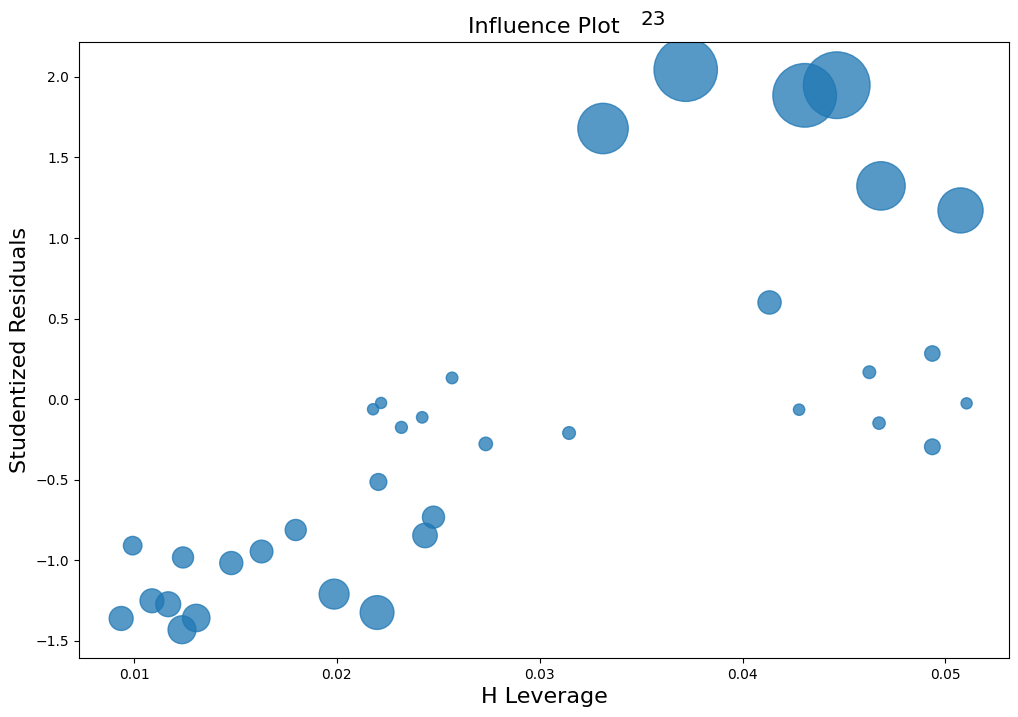

In [44]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, alpha = .05, ax = ax, criterion="cooks")

# The numbered outlier "23" would be a data point to remove. The outliers are labeled

### To screen for outliers using a table, use the code below

In [45]:
infl = model.get_influence()

In [46]:
print(infl.summary_frame())

    dfb_PowerBoats   cooks_d  standard_resid  hat_diag  dffits_internal   
0        -0.132313  0.017079       -1.344190  0.009364        -0.130685  \
1        -0.091052  0.008333       -0.911488  0.009930        -0.091285   
2        -0.131236  0.016941       -1.240967  0.010881        -0.130158   
3        -0.138372  0.018804       -1.261270  0.011682        -0.137128   
4        -0.110133  0.012142       -0.982851  0.012413        -0.110190   
5        -0.160086  0.024862       -1.409258  0.012364        -0.157676   
6        -0.156233  0.023818       -1.341372  0.013064        -0.154330   
7        -0.124618  0.015514       -1.016502  0.014792        -0.124555   
8        -0.121656  0.014847       -0.946983  0.016286        -0.121846   
9        -0.109841  0.012187       -0.816096  0.017970        -0.110396   
10       -0.172217  0.029260       -1.201621  0.019862        -0.171055   
11       -0.009384  0.000091       -0.063826  0.021783        -0.009524   
12       -0.017788  0.000

The DFBETAS value is shown in the dfb_PowerBoats column, and if any value is greater than 1, then you have a problem with an influential value.

The DFFITS value is shown in the dffits column, and like DFBETAS, if you have a value greater than 1, this indicates a problem.

Leverage values are shown in the hat_diag column, and if a value is in the .2 - .5 range, you may have a moderate outlier problem, and if it is over .5, then you have a large outlier problem.

Studentized deleted residuals are shown in the student_resid column, and if you have a value over 2.5 or 3, you probably have an outlier problem

# Interpreting the Regression Output
* After testing assumptions use .summary()

In [47]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          ManateeDeaths   R-squared (uncentered):                   0.945
Model:                            OLS   Adj. R-squared (uncentered):              0.943
Method:                 Least Squares   F-statistic:                              584.4
Date:                Fri, 28 Apr 2023   Prob (F-statistic):                    5.35e-23
Time:                        10:30:04   Log-Likelihood:                         -141.48
No. Observations:                  35   AIC:                                      285.0
Df Residuals:                      34   BIC:                                      286.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PowerBoats     0.0750      0.003     24.174      0.000       0.069       0.081
==============================================================================
Omnibus:                        4.022   Durbin-Watson:                   0.782
Prob(Omnibus):                  0.134   Jarque-Bera (JB):                3.676
Skew:                           0.775   Prob(JB):                        0.159
Kurtosis:                       2.660   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* F-statistic and p value are statistically significant

* You have your slope under coef

* R-squared and Adj. R-squared in the upper right hand corner, you see that this model accounts for 94% of the variance in explaining manatee deaths.

* Omnibus: This is a test of skew and kurtosis of the residual. You want a value close to zero, which would indicate normality.

* Prob(Omnibus): This is a test indicating the probability that residuals are normally distributed. You would like to see a value close to zero here, to indicate a normal distribution.

* Skew: Again, you would like to see a value close to zero, and this result feeds into the Omnibus test discussed above.

* Kurtosis: If you have a value close to zero, this means our data is relatively normal.

* Durbin-Watson: This also tests for homoscedasticity! You would like a value between 1 and 2, otherwise you have the presence of heteroscedasticity within your data.

* Jarque-Bera (JB): This also tests skew and kurtosis. It should also be close to zero.

* Prob (JB): The probability that JB is normal. You would like this to be close to zero as well.

* Condition Number: You would like to see a condition number below 30 or so, because that indicates low multicollinearity. If you have higher than 30, it's time to suspect related variables!